# Importing Libraries

In [12]:
library(caret)
library(mlbench)
library(pROC)

In [15]:
data<-read.csv(file.choose(), header=T)

In [16]:
head(data)

admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


In [17]:
str(data)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


In [18]:
summary(data)

     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

In [19]:
data$admit[data$admit==0]<-'no'
data$admit[data$admit==1]<-'yes'

In [20]:
data$admit<-factor(data$admit)

In [21]:
str(data)

'data.frame':	400 obs. of  4 variables:
 $ admit: Factor w/ 2 levels "no","yes": 1 2 2 2 1 2 2 1 2 1 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


# Data Partition

In [22]:
set.seed(1234)

In [23]:
ind<-sample(2, nrow(data), replace=T, prob=c(0.7,0.3))

In [24]:
training<-data[ind==1,]
test<-data[ind==2,]

# Model ---KNN

In [28]:
trControl <- trainControl(method = "repeatedcv",
                          number = 10,
                          repeats = 3,
                          classProbs = TRUE,
                          summaryFunction = twoClassSummary)

In [29]:
set.seed(222)

In [30]:
fit <- train(admit ~ .,
             data = training,
             method = 'knn',
             tuneLength = 20,
             trControl = trControl,
             preProc = c("center", "scale"),
             metric = "ROC",
             tuneGrid = expand.grid(k = 1:60))


k-Nearest Neighbors 

284 samples
  3 predictor
  2 classes: 'no', 'yes' 

Pre-processing: centered (3), scaled (3) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 256, 256, 256, 256, 255, 256, ... 
Resampling results across tuning parameters:

  k   ROC        Sens       Spec      
   1  0.5412281  0.7100000  0.36962963
   2  0.5631871  0.7019298  0.35703704
   3  0.5822368  0.7973684  0.34074074
   4  0.5622904  0.7770175  0.26111111
   5  0.5878558  0.8065789  0.28518519
   6  0.5911501  0.8241228  0.27740741
   7  0.5884016  0.8585965  0.28296296
   8  0.5892982  0.8550877  0.26851852
   9  0.5965010  0.8725439  0.29074074
  10  0.5899123  0.8657895  0.27444444
  11  0.5955945  0.8799123  0.28555556
  12  0.5876170  0.8695614  0.27740741
  13  0.5942300  0.8659649  0.24185185
  14  0.5949854  0.8885965  0.25703704
  15  0.5987768  0.8816667  0.22777778
  16  0.6125097  0.8974561  0.22074074
  17  0.6257943  0.8976316  0.23629630
  18  0.6256481  0

ROC curve variable importance

     Importance
gpa      100.00
rank      25.18
gre        0.00

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  79  29
       yes  3   5
                                         
               Accuracy : 0.7241         
                 95% CI : (0.6334, 0.803)
    No Information Rate : 0.7069         
    P-Value [Acc > NIR] : 0.3848         
                                         
                  Kappa : 0.1423         
                                         
 Mcnemar's Test P-Value : 9.897e-06      
                                         
            Sensitivity : 0.9634         
            Specificity : 0.1471         
         Pos Pred Value : 0.7315         
         Neg Pred Value : 0.6250         
             Prevalence : 0.7069         
         Detection Rate : 0.6810         
   Detection Prevalence : 0.9310         
      Balanced Accuracy : 0.5552         
                                         
       'Positive' Class : no             
                                         

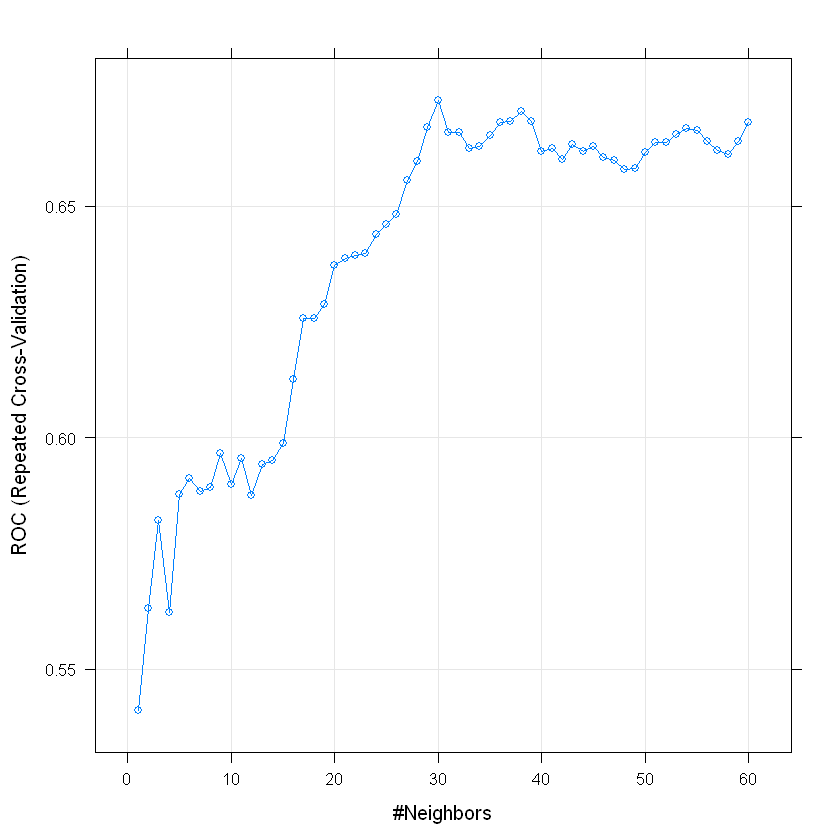

In [31]:
# Model Performance
fit
plot(fit)
varImp(fit)
pred <- predict(fit, newdata = test)
confusionMatrix(pred, test$admit)